In [1]:
!pip install matplotlib==3.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 44.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib] 5/6 [matplotlib]ow]


In [21]:
import json
import pathlib
import pickle
from typing import List
from typing import Tuple

import pandas
from sklearn import model_selection
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing

In [22]:
SALES_PATH = "../data/kc_house_data.csv"  # path to CSV with home sale data
DEMOGRAPHICS_PATH = "../data/zipcode_demographics.csv"  # path to CSV with demographics
# List of columns (subset) that will be taken from home sale data
SALES_COLUMN_SELECTION = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'zipcode'
]
OUTPUT_DIR = "model"  # Directory where output artifacts will be saved

In [23]:
def load_data(
    sales_path: str, demographics_path: str, sales_column_selection: List[str]
) -> Tuple[pandas.DataFrame, pandas.Series]:
    """Load the target and feature data by merging sales and demographics.

    Args:
        sales_path: path to CSV file with home sale data
        demographics_path: path to CSV file with home sale data
        sales_column_selection: list of columns from sales data to be used as
            features

    Returns:
        Tuple containg with two elements: a DataFrame and a Series of the same
        length.  The DataFrame contains features for machine learning, the
        series contains the target variable (home sale price).

    """
    data = pandas.read_csv(sales_path,
                           usecols=sales_column_selection,
                           dtype={'zipcode': str})
    demographics = pandas.read_csv("../data/zipcode_demographics.csv",
                                   dtype={'zipcode': str})

    merged_data = data.merge(demographics, how="left",
                             on="zipcode").drop(columns="zipcode")
    # Remove the target variable from the dataframe, features will remain
    y = merged_data.pop('price')
    x = merged_data

    return x, y

In [13]:
"""Load data, train model, and export artifacts."""
x, y = load_data(SALES_PATH, DEMOGRAPHICS_PATH, SALES_COLUMN_SELECTION)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, random_state=42)

In [14]:
model = pipeline.make_pipeline(
    preprocessing.RobustScaler(),
    neighbors.KNeighborsRegressor()
).fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred, label="Test"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} R²: {r2:.3f}")
    print(f"{label} MAE: {mae:.3f}")
    print(f"{label} RMSE: {rmse:.3f}")
    print("-" * 40)

evaluate_model(y_train, y_pred_train, label="Train")
evaluate_model(y_test, y_pred_test, label="Test")


Train R²: 0.841
Train MAE: 76232.250
Train RMSE: 143466.794
----------------------------------------
Test R²: 0.728
Test MAE: 102044.696
Test RMSE: 201659.432
----------------------------------------


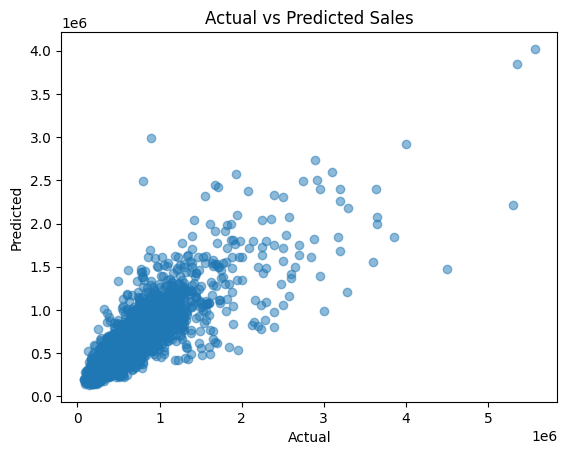

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Sales")
plt.show()


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}, RMSE: {rmse:.2f}")

R²: 0.778, RMSE: 183321.78


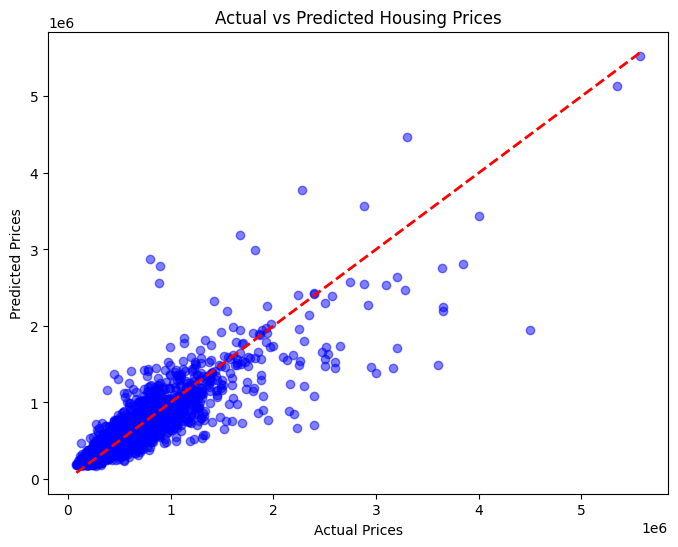

In [25]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


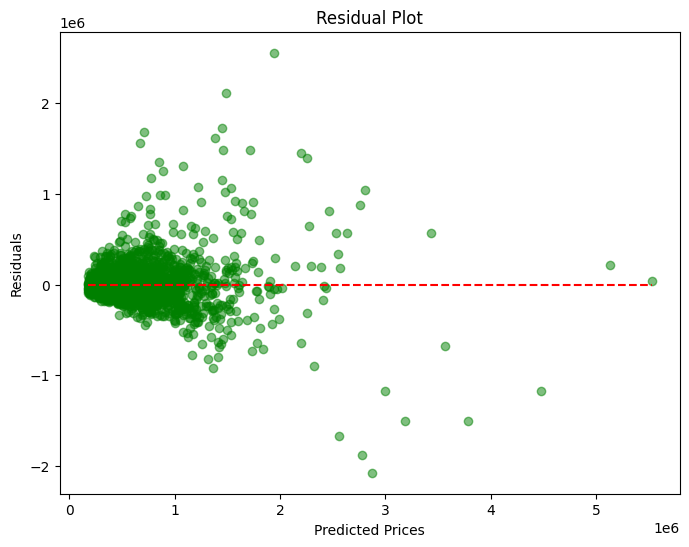

In [26]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

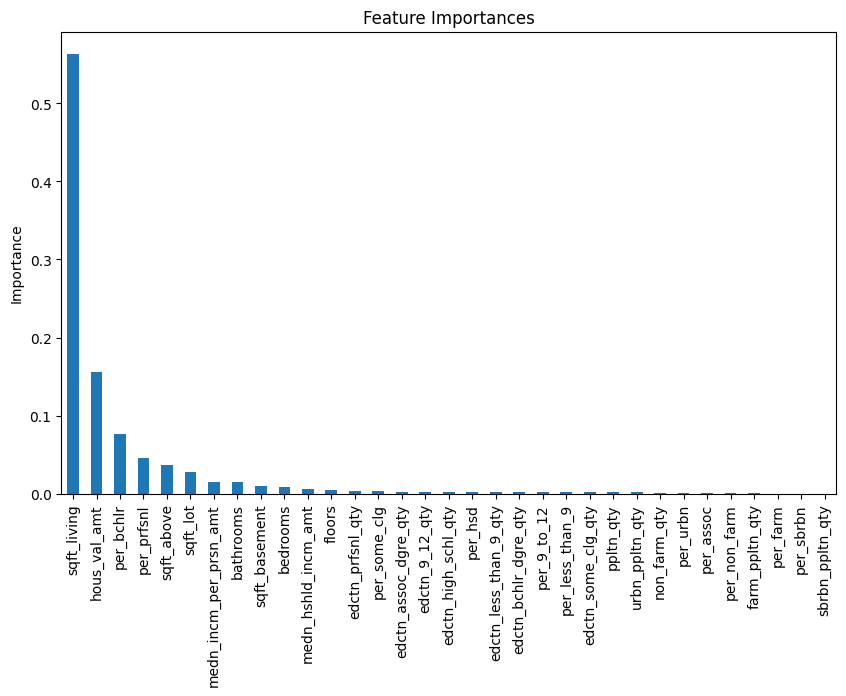

In [27]:
import pandas as pd
import numpy as np

feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()

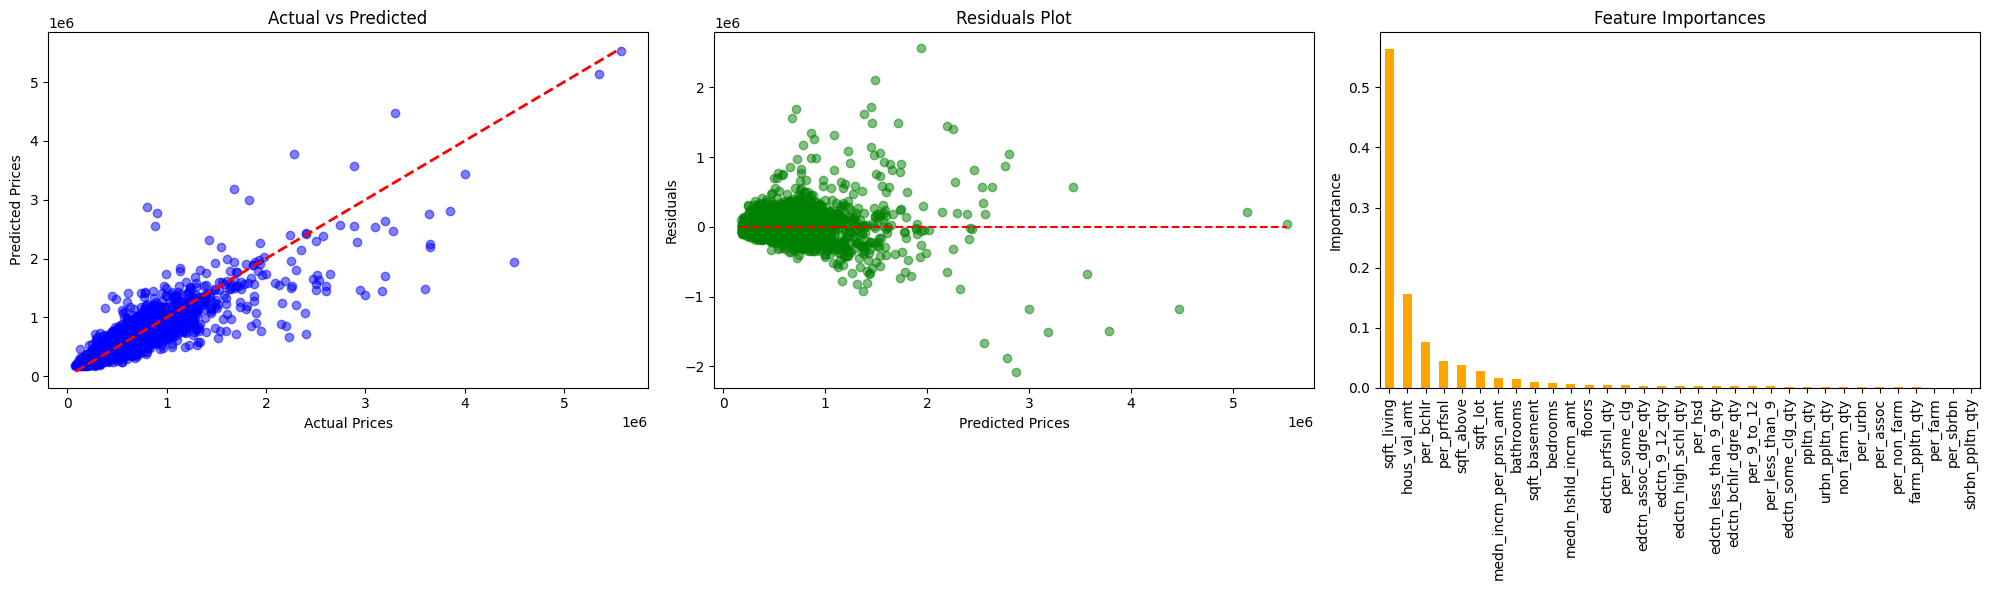

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute residuals
residuals = y_test - y_pred

# Feature importances (Random Forest)
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1️⃣ Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title("Actual vs Predicted")

# 2️⃣ Residuals
axes[1].scatter(y_pred, residuals, alpha=0.5, color='green')
axes[1].hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
axes[1].set_xlabel("Predicted Prices")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals Plot")

# 3️⃣ Feature Importances
feature_importances.plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title("Feature Importances")
axes[2].set_ylabel("Importance")

plt.tight_layout()
plt.show()

R² Score: 0.872
RMSE: 139135.21


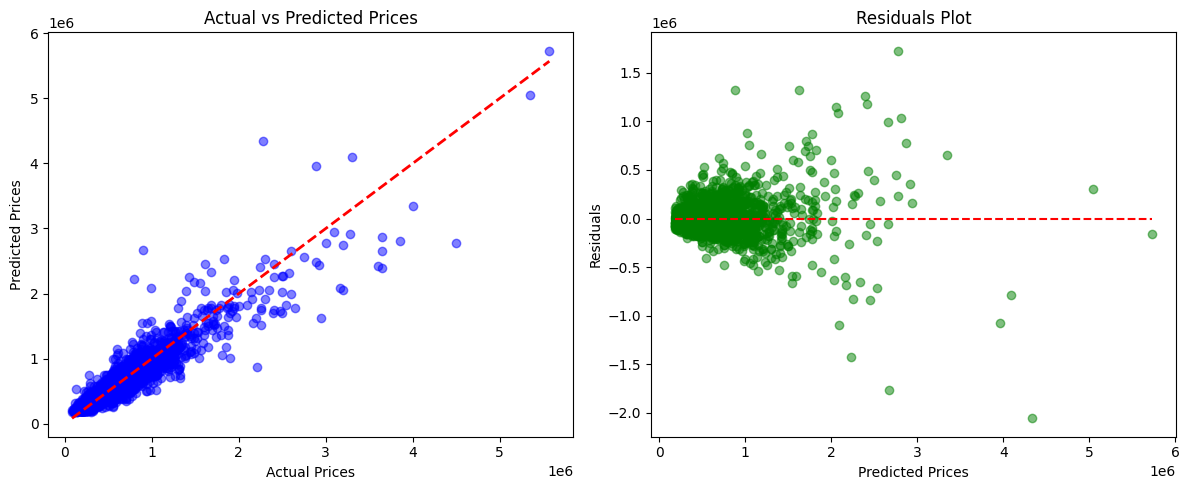

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data
# -----------------------------
housing_data = pd.read_csv("../data/kc_house_data.csv")
demographics = pd.read_csv("../data/zipcode_demographics.csv")

# Merge demographic info on zipcode
data = housing_data.merge(demographics, on="zipcode", how="left")

# Define target and features
TARGET_COLUMN = "price"
y = data[TARGET_COLUMN]
X = data.drop(columns=[TARGET_COLUMN, "id", "date"])  # drop id and date

# -----------------------------
# 2. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. Preprocessing
# -----------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# 4. Build pipeline
# -----------------------------
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42))
])

# -----------------------------
# 5. Train the model
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 6. Predict on test set
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 7. Evaluate performance
# -----------------------------
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")    
print(f"RMSE: {rmse:.2f}")      

# -----------------------------
# 8. Visualization
# -----------------------------
plt.figure(figsize=(12,5))

# Actual vs Predicted
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

# Residuals
plt.subplot(1,2,2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals Plot")

plt.tight_layout()
plt.show()